In [ ]:
!pip install kaggle

In [ ]:
# Move the uploaded API key to the appropriate folder
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
# Set appropriate permissions for the API key
!chmod 600 ~/.kaggle/kaggle.json
# Download the competition dataset
!kaggle competitions download -c cpe342-karena

 98% 902M/922M [00:04<00:00, 89.2MB/s]
100% 922M/922M [00:04<00:00, 211MB/s] 


In [ ]:
import zipfile
import os

zip_file_path = "/content/cpe342-karena.zip"
target_folder = "/content/datasets"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_folder)

print("Files extracted and appended to", target_folder)

Files extracted and appended to /content/datasets


Loading /content/datasets/public_dataset/task4/train.csv...
First 5 rows:
         id    file_name  label
0  PLY00001  su7tkav.jpg      0
1  PLY00002  shlk51f.jpg      4
2  PLY00003  sbdqvs0.jpg      0
3  PLY00004  s6oe1m9.jpg      2
4  PLY00005  skn51jb.jpg      0

Analyzing class distribution based on column: 'label'
label
0    12429
3     5926
2     5596
1     4407
4     3188
Name: count, dtype: int64


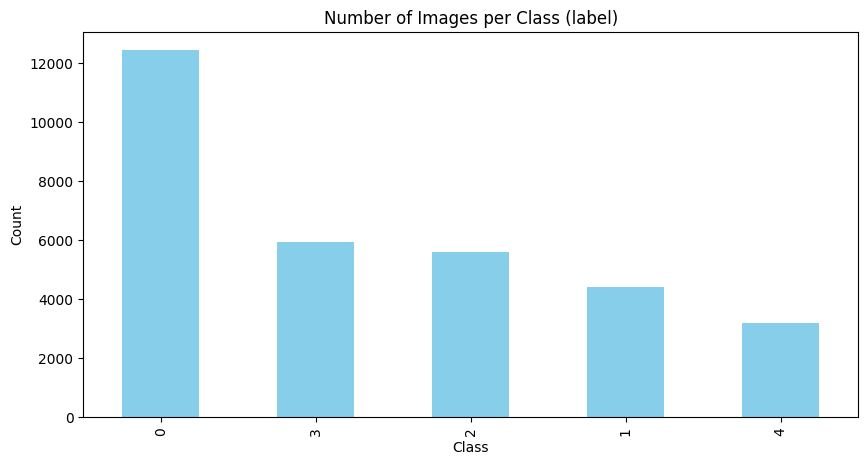


Total files in image directory '/content/datasets/public_dataset/task4/train': 31546


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define paths
csv_path = '/content/datasets/public_dataset/task4/train.csv'
image_dir = '/content/datasets/public_dataset/task4/train'

# Analyze CSV
if os.path.exists(csv_path):
    print(f"Loading {csv_path}...")
    df = pd.read_csv(csv_path)
    print("First 5 rows:")
    print(df.head())

    # Attempt to auto-detect the target/class column
    # Common names: label, class, target. If not found, use the last column.
    target_col = df.columns[-1]  # Default to last column
    for col in ['label', 'class', 'target', 'category']:
        if col in df.columns:
            target_col = col
            break

    print(f"\nAnalyzing class distribution based on column: '{target_col}'")
    class_counts = df[target_col].value_counts()
    print(class_counts)

    # Plot distribution
    plt.figure(figsize=(10, 5))
    class_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Number of Images per Class ({target_col})')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()
else:
    print(f"CSV file not found at: {csv_path}")

# Check image directory count
if os.path.exists(image_dir) and os.path.isdir(image_dir):
    files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
    print(f"\nTotal files in image directory '{image_dir}': {len(files)}")
else:
    print(f"\nImage directory not found or is not a directory: {image_dir}")

Loading /content/datasets/public_dataset/task4/val.csv...
First 5 rows of Validation Data:


,id,file_name,label
0,VAL00001,st18mb9.jpg,4
1,VAL00002,sswbsm7.jpg,3
2,VAL00003,sfr46vb.jpg,1
3,VAL00004,sefug9r.jpg,2
4,VAL00005,soqw895.jpg,0



Analyzing class distribution based on column: 'label'
label
4    7549
2    6681
1    4194
0    3436
3    2912
Name: count, dtype: int64


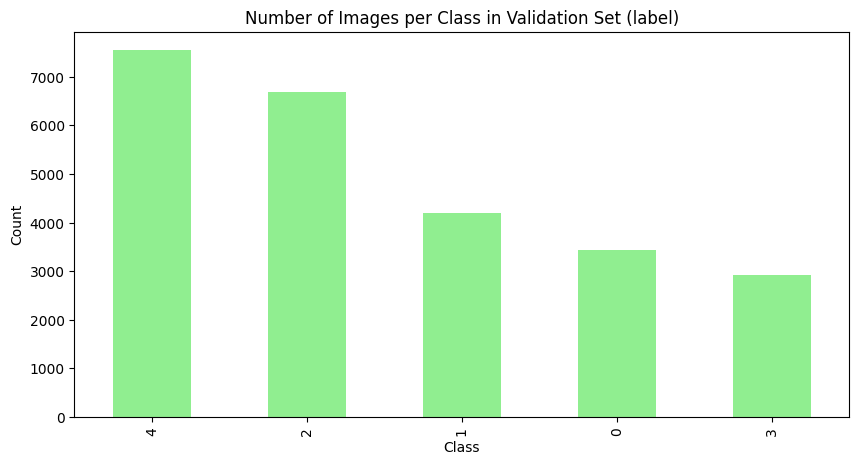


Total files in validation image directory '/content/datasets/public_dataset/task4/val': 24772


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define paths for validation
val_csv_path = '/content/datasets/public_dataset/task4/val.csv'
val_image_dir = '/content/datasets/public_dataset/task4/val'

# Analyze Validation CSV
if os.path.exists(val_csv_path):
    print(f"Loading {val_csv_path}...")
    val_df = pd.read_csv(val_csv_path)
    print("First 5 rows of Validation Data:")
    display(val_df.head())

    # Attempt to auto-detect the target/class column
    target_col = val_df.columns[-1]
    for col in ['label', 'class', 'target', 'category']:
        if col in val_df.columns:
            target_col = col
            break

    print(f"\nAnalyzing class distribution based on column: '{target_col}'")
    val_class_counts = val_df[target_col].value_counts()
    print(val_class_counts)

    # Plot distribution
    plt.figure(figsize=(10, 5))
    val_class_counts.plot(kind='bar', color='lightgreen')
    plt.title(f'Number of Images per Class in Validation Set ({target_col})')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()
else:
    print(f"Validation CSV file not found at: {val_csv_path}")

# Check validation image directory count
if os.path.exists(val_image_dir) and os.path.isdir(val_image_dir):
    val_files = [f for f in os.listdir(val_image_dir) if os.path.isfile(os.path.join(val_image_dir, f))]
    print(f"\nTotal files in validation image directory '{val_image_dir}': {len(val_files)}")
else:
    print(f"\nValidation image directory not found or is not a directory: {val_image_dir}")

In [ ]:
import pandas as pd
df = pd.read_csv("/content/datasets/public_dataset/task4/train.csv")
df

,id,file_name,label
0,PLY00001,su7tkav.jpg,0
1,PLY00002,shlk51f.jpg,4
2,PLY00003,sbdqvs0.jpg,0
3,PLY00004,s6oe1m9.jpg,2
4,PLY00005,skn51jb.jpg,0
...,...,...,...
31541,PLY31542,s7dkzn8.jpg,3
31542,PLY31543,s3cv03f.jpg,3
31543,PLY31544,s5if1t8.jpg,2
31544,PLY31545,ssw22r5.jpg,0


In [ ]:
import pandas as pd
import os
import shutil
from tqdm import tqdm  # Library for progress bars

# --- Configuration ---
csv_path = '/content/datasets/public_dataset/task4/train.csv'
source_img_dir = '/content/datasets/public_dataset/task4/train'
destination_root = '/content/data/train'
images_per_class = 3000

# 1. Load the CSV
print(f"Loading CSV from {csv_path}...")
df = pd.read_csv(csv_path)

# 2. Get unique classes
unique_classes = df['label'].unique()
print(f"Found {len(unique_classes)} classes: {unique_classes}")

# 3. Process each class
for class_name in unique_classes:
    class_name = str(class_name) # Ensure label is a string
    print(f"\nProcessing Class: {class_name}")

    # Create destination folder for this class
    dest_dir = os.path.join(destination_root, class_name)
    os.makedirs(dest_dir, exist_ok=True)

    # Filter the dataframe for this specific class
    class_df = df[df['label'] == int(class_name) if class_name.isdigit() else class_name]

    # Check if we have enough images
    total_available = len(class_df)
    if total_available < images_per_class:
        print(f"⚠️ Warning: Class {class_name} only has {total_available} images. Moving all of them.")
        selected_df = class_df
    else:
        # Randomly sample 3000 images
        selected_df = class_df.sample(n=images_per_class, random_state=42)
        print(f"Selected {images_per_class} images out of {total_available}")

    # Move the files
    # Using tqdm to show a progress bar
    count_moved = 0
    for _, row in tqdm(selected_df.iterrows(), total=len(selected_df), desc=f"Moving {class_name}"):
        file_name = row['file_name']

        # Construct full paths
        src_path = os.path.join(source_img_dir, file_name)
        dst_path = os.path.join(dest_dir, file_name)

        # Check if source file exists before moving
        if os.path.exists(src_path):
            try:
                shutil.move(src_path, dst_path)
                count_moved += 1
            except Exception as e:
                print(f"Error moving {file_name}: {e}")
        else:
            # Check if it's already at destination (in case you re-run code)
            if not os.path.exists(dst_path):
                print(f"File not found: {src_path}")

    print(f"Successfully moved {count_moved} images for class {class_name}")

print("\n--- Process Complete ---")
print(f"Check your data at: {destination_root}")

Loading CSV from /content/datasets/public_dataset/task4/train.csv...
Found 5 classes: [0 4 2 1 3]

Processing Class: 0
Selected 3000 images out of 12429


Moving 0: 100%|██████████| 3000/3000 [00:00<00:00, 3387.76it/s]


Successfully moved 3000 images for class 0

Processing Class: 4
Selected 3000 images out of 3188


Moving 4: 100%|██████████| 3000/3000 [00:00<00:00, 4311.72it/s]


Successfully moved 3000 images for class 4

Processing Class: 2
Selected 3000 images out of 5596


Moving 2: 100%|██████████| 3000/3000 [00:00<00:00, 3647.27it/s]


Successfully moved 3000 images for class 2

Processing Class: 1
Selected 3000 images out of 4407


Moving 1: 100%|██████████| 3000/3000 [00:00<00:00, 5543.12it/s]


Successfully moved 3000 images for class 1

Processing Class: 3
Selected 3000 images out of 5926


Moving 3: 100%|██████████| 3000/3000 [00:00<00:00, 3100.50it/s]

Successfully moved 3000 images for class 3

--- Process Complete ---
Check your data at: /content/data/train


In [ ]:
import pandas as pd
import os
import shutil
from tqdm import tqdm  # Library for progress bars

# --- Configuration ---
csv_path = '/content/datasets/public_dataset/task4/val.csv'
source_img_dir = '/content/datasets/public_dataset/task4/val'
destination_root = '/content/data/val'
images_per_class = 1000

# 1. Load the CSV
print(f"Loading CSV from {csv_path}...")
df = pd.read_csv(csv_path)

# 2. Get unique classes
unique_classes = df['label'].unique()
print(f"Found {len(unique_classes)} classes: {unique_classes}")

# 3. Process each class
for class_name in unique_classes:
    class_name = str(class_name) # Ensure label is a string
    print(f"\nProcessing Class: {class_name}")

    # Create destination folder for this class
    dest_dir = os.path.join(destination_root, class_name)
    os.makedirs(dest_dir, exist_ok=True)

    # Filter the dataframe for this specific class
    class_df = df[df['label'] == int(class_name) if class_name.isdigit() else class_name]

    # Check if we have enough images
    total_available = len(class_df)
    if total_available < images_per_class:
        print(f"⚠️ Warning: Class {class_name} only has {total_available} images. Moving all of them.")
        selected_df = class_df
    else:
        # Randomly sample 3000 images
        selected_df = class_df.sample(n=images_per_class, random_state=42)
        print(f"Selected {images_per_class} images out of {total_available}")

    # Move the files
    # Using tqdm to show a progress bar
    count_moved = 0
    for _, row in tqdm(selected_df.iterrows(), total=len(selected_df), desc=f"Moving {class_name}"):
        file_name = row['file_name']

        # Construct full paths
        src_path = os.path.join(source_img_dir, file_name)
        dst_path = os.path.join(dest_dir, file_name)

        # Check if source file exists before moving
        if os.path.exists(src_path):
            try:
                shutil.move(src_path, dst_path)
                count_moved += 1
            except Exception as e:
                print(f"Error moving {file_name}: {e}")
        else:
            # Check if it's already at destination (in case you re-run code)
            if not os.path.exists(dst_path):
                print(f"File not found: {src_path}")

    print(f"Successfully moved {count_moved} images for class {class_name}")

print("\n--- Process Complete ---")
print(f"Check your data at: {destination_root}")

Loading CSV from /content/datasets/public_dataset/task4/val.csv...
Found 5 classes: [4 3 1 2 0]

Processing Class: 4
Selected 1000 images out of 7549


Moving 4: 100%|██████████| 1000/1000 [00:00<00:00, 4062.41it/s]


Successfully moved 1000 images for class 4

Processing Class: 3
Selected 1000 images out of 2912


Moving 3: 100%|██████████| 1000/1000 [00:00<00:00, 4161.74it/s]


Successfully moved 1000 images for class 3

Processing Class: 1
Selected 1000 images out of 4194


Moving 1: 100%|██████████| 1000/1000 [00:00<00:00, 3451.94it/s]


Successfully moved 1000 images for class 1

Processing Class: 2
Selected 1000 images out of 6681


Moving 2: 100%|██████████| 1000/1000 [00:00<00:00, 3744.44it/s]


Successfully moved 1000 images for class 2

Processing Class: 0
Selected 1000 images out of 3436


Moving 0: 100%|██████████| 1000/1000 [00:00<00:00, 5178.54it/s]

Successfully moved 1000 images for class 0

--- Process Complete ---
Check your data at: /content/data/val


# State of the Art Model

In [ ]:
!pip install datasets

In [ ]:
!pip install -q --upgrade accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 9.1 MB/s eta 0:00:00


In [ ]:
!pip install -q --upgrade Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 67.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.49.1 requires pillow<12.0,>=8.0, but you have pillow 12.0.0 which is incompatible.


In [ ]:
!pip install --force-reinstall "pillow==10.2.0"

  Using cached pillow-10.2.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
Using cached pillow-10.2.0-cp312-cp312-manylinux_2_28_x86_64.whl (4.5 MB)
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0


In [ ]:
import glob
import random
from PIL import Image, ImageOps
import PIL

In [ ]:
from datasets import load_dataset

In [ ]:
import shutil
import os

folder = "/content/data/validation/Untitled Folder"
if os.path.exists(folder):
    shutil.rmtree(folder)
    print("Deleted:", folder)
else:
    print("Not found")


Not found


In [ ]:
!mv /content/data/val /content/data/validation

In [ ]:
import os
import shutil

def fix_hf_structure(root, split_name):

    # โฟลเดอร์ใหม่ที่ต้องการ
    new_root = os.path.join(root, split_name)

    # ถ้ายังไม่มี ให้สร้าง
    os.makedirs(new_root, exist_ok=True)

    # ย้ายทุกโฟลเดอร์ class → ไปอยู่ใน split folder
    for item in os.listdir(root):
        old_path = os.path.join(root, item)
        new_path = os.path.join(new_root, item)

        # ข้ามโฟลเดอร์ split ที่เพิ่งสร้าง
        if item == split_name:
            continue

        # เฉพาะโฟลเดอร์เท่านั้น (class folders)
        if os.path.isdir(old_path):
            print(f"Moving {old_path} → {new_path}")
            shutil.move(old_path, new_path)

    print(f"✔ Finished preparing structure for: {root}")


# ============================
# Apply to train + validation
# ============================

fix_hf_structure("/content/data/train", "train")
fix_hf_structure("/content/data/validation", "validation")

✔ Finished preparing structure for: /content/data/train
Moving /content/data/validation/0 → /content/data/validation/validation/0
Moving /content/data/validation/1 → /content/data/validation/validation/1
Moving /content/data/validation/4 → /content/data/validation/validation/4
Moving /content/data/validation/3 → /content/data/validation/validation/3
Moving /content/data/validation/2 → /content/data/validation/validation/2
✔ Finished preparing structure for: /content/data/validation


In [ ]:
from datasets import load_dataset
datasetTrain = load_dataset("imagefolder", data_dir="/content/data/train", split="train")
datasetVal   = load_dataset("imagefolder", data_dir="/content/data/validation", split="validation")

Resolving data files:   0%|          | 0/15000 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/5000 [00:00<?, ?it/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [ ]:
datasetTrain

Dataset({
    features: ['image', 'label'],
    num_rows: 15000
})

In [ ]:
datasetVal

Dataset({
    features: ['image', 'label'],
    num_rows: 5000
})

In [ ]:
from transformers import AutoImageProcessor, SwinForImageClassification

model_name_or_path = 'microsoft/swin-base-patch4-window7-224-in22k'

feature_extractor = AutoImageProcessor.from_pretrained(model_name_or_path)

labels = datasetTrain.features["label"].names

model = SwinForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={i: label for i, label in enumerate(labels)},
    label2id={label: i for i, label in enumerate(labels)},
    ignore_mismatched_sizes=True
)


Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224-in22k and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([21841]) in the checkpoint and torch.Size([5]) in the model instantiated
- classifier.weight: found shape torch.Size([21841, 1024]) in the checkpoint and torch.Size([5, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def process_example(example):
    inputs = feature_extractor(example['image'], return_tensors='pt')
    inputs['label'] = example['label']
    return inputs

img = datasetTrain[0]   # ← แก้ตรงนี้


In [ ]:
def transform(example_batch):
    # แปลงภาพเป็น pixel_values
    inputs = feature_extractor(example_batch["image"], return_tensors="pt")

    # เพิ่ม labels ไว้ใน batch
    inputs["labels"] = example_batch["label"]

    return inputs

# Apply transform
prepared_dataTrain = datasetTrain.with_transform(transform)
prepared_dataVal = datasetVal.with_transform(transform)


In [ ]:
!pip install evaluate -q  # Run this once if not installed

import torch
import numpy as np
import evaluate  # <-- use this instead of datasets

# === Collate function ===
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

# === Metric ===
metric = evaluate.load("accuracy")

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return metric.compute(predictions=preds, references=p.label_ids)

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./model",
  per_device_train_batch_size=96,
  eval_strategy="epoch",
  save_strategy="epoch",
  num_train_epochs=10,
  fp16=True,
  logging_steps=10,
  learning_rate=2e-5,
  save_total_limit=2,
  warmup_ratio=0.1,
  remove_unused_columns=False,
  push_to_hub=False,
  metric_for_best_model="accuracy",
  report_to='tensorboard',
  load_best_model_at_end=True,
  adafactor=False,  # Set to False to use AdamW
  weight_decay=0.01,  # Set your desired weight decay value here
)

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from transformers import Trainer, DefaultDataCollator

data_collator = DefaultDataCollator()

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    train_dataset=prepared_dataTrain,
    eval_dataset=prepared_dataVal,
    tokenizer=feature_extractor,
)
trainer.train()

/tmp/ipython-input-3263021492.py:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.309800,0.811815,0.709800
2,0.138400,0.618755,0.795200
3,0.037400,0.703324,0.798400
4,0.015100,0.885178,0.783600
5,0.002000,0.983710,0.788400
6,0.005400,1.008024,0.789600
7,0.000600,0.972135,0.804000
8,0.000400,0.980004,0.810400
9,0.000300,1.009336,0.808200
10,0.000200,1.011169,0.803600


TrainOutput(global_step=1570, training_loss=0.10730011764881171, metrics={'train_runtime': 1192.0665, 'train_samples_per_second': 125.832, 'train_steps_per_second': 1.317, 'total_flos': 1.17522499304448e+19, 'train_loss': 0.10730011764881171, 'epoch': 10.0})

In [ ]:
import os

path = '/content/datasets/public_dataset/task4/test'

if os.path.exists(path) and os.path.isdir(path):
    files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    print(f"Total files in '{path}': {len(files)}")
else:
    print(f"The path '{path}' does not exist or is not a directory.")

Total files in '/content/datasets/public_dataset/task4/test': 25889


In [ ]:
!pip install --force-reinstall "pillow==10.2.0"

  Using cached pillow-10.2.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
Using cached pillow-10.2.0-cp312-cp312-manylinux_2_28_x86_64.whl (4.5 MB)
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0


In [ ]:
!mkdir /content/models/

mkdir: cannot create directory ‘/content/models/’: File exists


In [ ]:
!cp -r /content/drive/MyDrive/checkpoint-1570 /content/models/

In [ ]:
from transformers import AutoImageProcessor, SwinForImageClassification
from PIL import Image
from tqdm import tqdm
import numpy as np
import os

processor = AutoImageProcessor.from_pretrained('/content/models/checkpoint-1570')
model = SwinForImageClassification.from_pretrained('/content/models/checkpoint-1570')

answer = {}

folder_path = '/content/datasets/public_dataset/task4/test'

# List files and sort them for consistency
files = sorted(os.listdir(folder_path))

for filename in tqdm(files, desc="Predicting", unit="image"):
    file_path = os.path.join(folder_path, filename)

    # Load image safely
    img = Image.open(file_path).convert('RGB')

    # Preprocess
    inputs = processor(images=img, return_tensors="pt")

    # Inference
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()

    # Save answer
    answer[filename] = model.config.id2label[predicted_class_idx]


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Predicting: 100%|██████████| 25889/25889 [4:14:41<00:00,  1.69image/s]


In [ ]:
answer

{'s001rpz.jpg': '2',
 's001six.jpg': '3',
 's001zyd.jpg': '0',
 's002wn3.jpg': '3',
 's003i0u.jpg': '3',
 's004hv1.jpg': '2',
 's004yex.jpg': '2',
 's00664k.jpg': '1',
 's009lq1.jpg': '4',
 's00cjew.jpg': '3',
 's00eesk.jpg': '3',
 's00eqj7.jpg': '1',
 's00fman.jpg': '2',
 's00h5bo.jpg': '4',
 's00hxxm.jpg': '0',
 's00q0nu.jpg': '1',
 's00qkoh.jpg': '2',
 's00toau.jpg': '0',
 's00u9u2.jpg': '4',
 's00vyvv.jpg': '0',
 's010e6v.jpg': '1',
 's012jjq.jpg': '4',
 's013wbn.jpg': '1',
 's016ken.jpg': '3',
 's016npk.jpg': '2',
 's018sjl.jpg': '3',
 's01a7sw.jpg': '1',
 's01ahx4.jpg': '3',
 's01e8nb.jpg': '4',
 's01eo2o.jpg': '2',
 's01fbxr.jpg': '3',
 's01int2.jpg': '4',
 's01k2y3.jpg': '2',
 's01ksr2.jpg': '0',
 's01ojh0.jpg': '3',
 's01qizh.jpg': '0',
 's01scbi.jpg': '2',
 's01sy5z.jpg': '4',
 's01x12o.jpg': '1',
 's01xqb7.jpg': '0',
 's01z0fe.jpg': '1',
 's020e36.jpg': '3',
 's020ty0.jpg': '3',
 's021073.jpg': '1',
 's0224um.jpg': '4',
 's0249ei.jpg': '1',
 's025gbm.jpg': '1',
 's025mq1.jpg

In [ ]:
import pandas as pd

csv_path = "/content/datasets/public_dataset/task4/test_refined.csv"
df = pd.read_csv(csv_path)

In [ ]:
df["label"] = df["file_name"].map(answer)

# เซฟกลับไปเป็นไฟล์ใหม่
output_path = "/content/datasets/public_dataset/task4/test_refined_labeled.csv"
df.to_csv(output_path, index=False)

In [ ]:
df

,id,file_name,label
0,ANS00001,sjqyfwc.jpg,4
1,ANS00002,s07kzz5.jpg,2
2,ANS00003,sr69rma.jpg,3
3,ANS00004,soqvor4.jpg,0
4,ANS00005,s2v4jw3.jpg,3
...,...,...,...
25884,ANS25885,snuk1yc.jpg,1
25885,ANS25886,sdftli5.jpg,0
25886,ANS25887,stptumk.jpg,3
25887,ANS25888,suyre0m.jpg,4


In [ ]:
df = df.rename(columns={"label": "task4"})
df

,id,file_name,task4
0,ANS00001,sjqyfwc.jpg,4
1,ANS00002,s07kzz5.jpg,2
2,ANS00003,sr69rma.jpg,3
3,ANS00004,soqvor4.jpg,0
4,ANS00005,s2v4jw3.jpg,3
...,...,...,...
25884,ANS25885,snuk1yc.jpg,1
25885,ANS25886,sdftli5.jpg,0
25886,ANS25887,stptumk.jpg,3
25887,ANS25888,suyre0m.jpg,4


In [ ]:
df_send = pd.read_csv("/content/test_ra_bup_add.csv")
df_send

,id,task1,task2,task3,task4,task5
0,ANS00001,1,2,19.632803,4,0
1,ANS00002,0,0,130.198800,2,0
2,ANS00003,0,0,23753.340000,3,0
3,ANS00004,0,0,8.611492,3,0
4,ANS00005,1,0,33.705334,3,0
...,...,...,...,...,...,...
25884,ANS25885,0,0,12.298310,1,0
25885,ANS25886,1,1,8.164954,0,0
25886,ANS25887,0,1,1723.782200,3,0
25887,ANS25888,0,0,7.524567,0,0


In [ ]:
import pandas as pd

# เลือกเฉพาะ id และ task4 ใหม่
df_new = df[["id", "task4"]]

# เอาค่า task4 ใหม่ไปแทน task4 เดิมใน df_send
df_send = df_send.drop(columns=["task4"]).merge(df_new, on="id", how="left")
df_send
# เซฟเป็นไฟล์ใหม่


,id,task1,task2,task3,task5,task4
0,ANS00001,1,2,19.632803,0,4
1,ANS00002,0,0,130.198800,0,2
2,ANS00003,0,0,23753.340000,0,3
3,ANS00004,0,0,8.611492,0,0
4,ANS00005,1,0,33.705334,0,3
...,...,...,...,...,...,...
25884,ANS25885,0,0,12.298310,0,1
25885,ANS25886,1,1,8.164954,0,0
25886,ANS25887,0,1,1723.782200,0,3
25887,ANS25888,0,0,7.524567,0,4


In [ ]:
df_send = df_send[["id", "task1", "task2", "task3", "task4", "task5"]]
df_send

,id,task1,task2,task3,task4,task5
0,ANS00001,1,2,19.632803,4,0
1,ANS00002,0,0,130.198800,2,0
2,ANS00003,0,0,23753.340000,3,0
3,ANS00004,0,0,8.611492,0,0
4,ANS00005,1,0,33.705334,3,0
...,...,...,...,...,...,...
25884,ANS25885,0,0,12.298310,1,0
25885,ANS25886,1,1,8.164954,0,0
25886,ANS25887,0,1,1723.782200,3,0
25887,ANS25888,0,0,7.524567,4,0


In [ ]:
df_send.to_csv("send_answer_swin.csv", index=False)

df_send.head()


,id,task1,task2,task3,task4,task5
0,ANS00001,1,2,19.632803,4,0
1,ANS00002,0,0,130.198800,2,0
2,ANS00003,0,0,23753.340000,3,0
3,ANS00004,0,0,8.611492,0,0
4,ANS00005,1,0,33.705334,3,0
